In [1]:
import yfinance as yf

# Crear el objeto para Tesla
tesla = yf.Ticker("TSLA")

# Descargar el historial de precios (por defecto: últimos 5 años)
data = tesla.history(period="max", interval="1d")

# Mostrar las primeras filas del DataFrame
print(data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}

html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html.parser")

tables = soup.find_all("table")

revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

if revenue_table is None:
    raise ValueError("No se encontró la tabla de ingresos de Tesla.")

rows = revenue_table.find_all("tr")

dates = []
revenues = []

for row in rows[1:]:  # Saltar encabezado
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            dates.append(date)
            revenues.append(float(revenue))

tesla_revenue = pd.DataFrame({"Date": dates, "Revenue (USD millions)": revenues})
print(tesla_revenue.tail())


          Date  Revenue (USD millions)
58  2010-09-30                    31.0
59  2010-06-30                    28.0
60  2010-03-31                    21.0
61  2009-09-30                    46.0
62  2009-06-30                    27.0


In [3]:
# 1. Instalar yfinance si no lo tienes
# !pip install yfinance

# 2. Importar librerías
import yfinance as yf
import pandas as pd

# 3. Descargar datos de GameStop
gme_data = yf.download("GME", period="max", interval="1d")

# 4. Reiniciar índice
gme_data.reset_index(inplace=True)

# 5. Mostrar las primeras cinco filas
print(gme_data.head())


/var/folders/r5/5qvj11914_l53jm9xvx55hj40000gn/T/ipykernel_66732/2992326802.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", period="max", interval="1d")
[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open    Volume
Ticker                  GME       GME       GME       GME       GME
0      2002-02-13  1.691667  1.693350  1.603296  1.620129  76216000
1      2002-02-14  1.683251  1.716074  1.670626  1.712707  11021600
2      2002-02-15  1.674834  1.687458  1.658001  1.683250   8389600
3      2002-02-19  1.607504  1.666417  1.578047  1.666417   7410400
4      2002-02-20  1.662210  1.662210  1.603296  1.615920   6892800


In [4]:
# 1. Instalar yfinance si no lo tienes
# !pip install yfinance

# 2. Importar librerías
import yfinance as yf
import pandas as pd

# 3. Descargar datos de GameStop
gme_data = yf.download("GME", period="max", interval="1d")

# 4. Reiniciar índice
gme_data.reset_index(inplace=True)

# 5. Mostrar las primeras cinco filas
print(gme_data.tail())


/var/folders/r5/5qvj11914_l53jm9xvx55hj40000gn/T/ipykernel_66732/1631696854.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", period="max", interval="1d")
[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open    Volume
Ticker                   GME        GME        GME        GME       GME
5892   2025-07-16  23.680000  23.850000  23.309999  23.400000   7738300
5893   2025-07-17  23.400000  23.719999  23.379999  23.540001   7307200
5894   2025-07-18  23.280001  23.510000  23.129999  23.459999   6628400
5895   2025-07-21  24.200001  24.430000  23.049999  23.280001  17718400
5896   2025-07-22  24.260000  24.840000  23.540001  24.139999  11761737


/var/folders/r5/5qvj11914_l53jm9xvx55hj40000gn/T/ipykernel_66732/2097912616.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download("TSLA", period="1y", interval="1d")
[*********************100%***********************]  1 of 1 completed


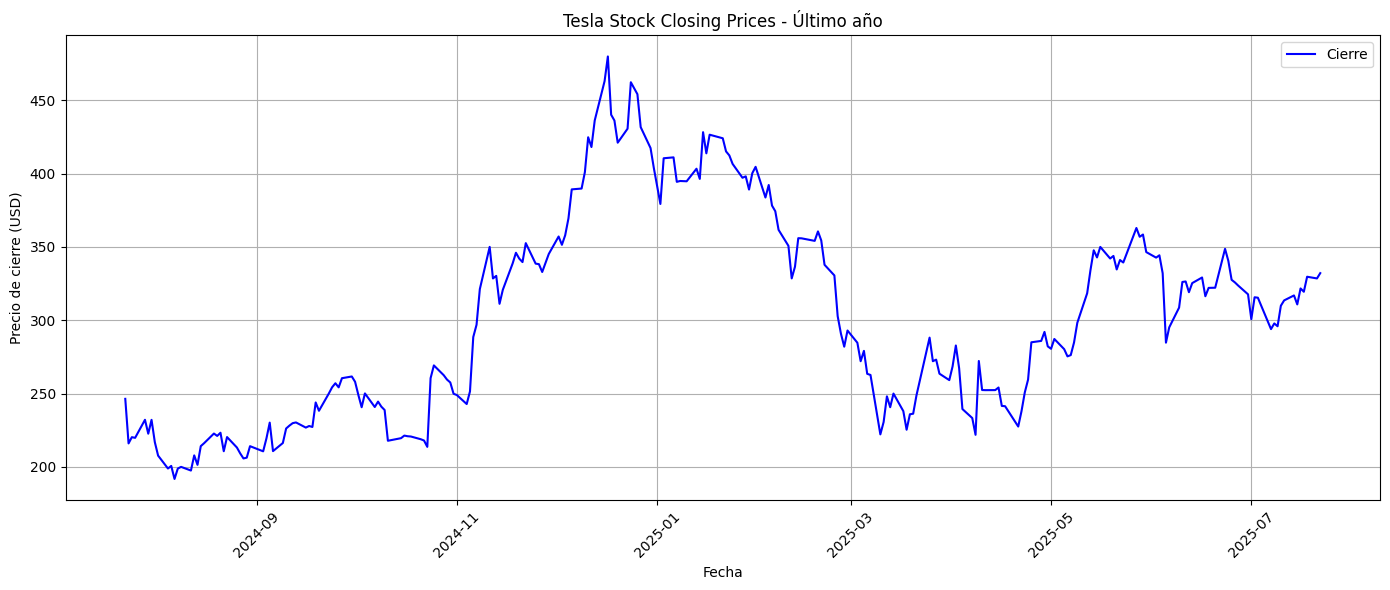

In [5]:
# 1. Importar librerías necesarias
import yfinance as yf
import matplotlib.pyplot as plt

# 2. Descargar los datos de Tesla
tesla_data = yf.download("TSLA", period="1y", interval="1d")

# 3. Reiniciar el índice (para tener la columna "Date")
tesla_data.reset_index(inplace=True)

# 4. Definir la función make_graph
def make_graph(data, title):
    plt.figure(figsize=(14,6))
    plt.plot(data["Date"], data["Close"], label="Cierre", color="blue")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre (USD)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Llamar a la función con los datos de Tesla
make_graph(tesla_data, "Tesla Stock Closing Prices - Último año")


/var/folders/r5/5qvj11914_l53jm9xvx55hj40000gn/T/ipykernel_66732/2359946185.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", period="1y", interval="1d")
[*********************100%***********************]  1 of 1 completed


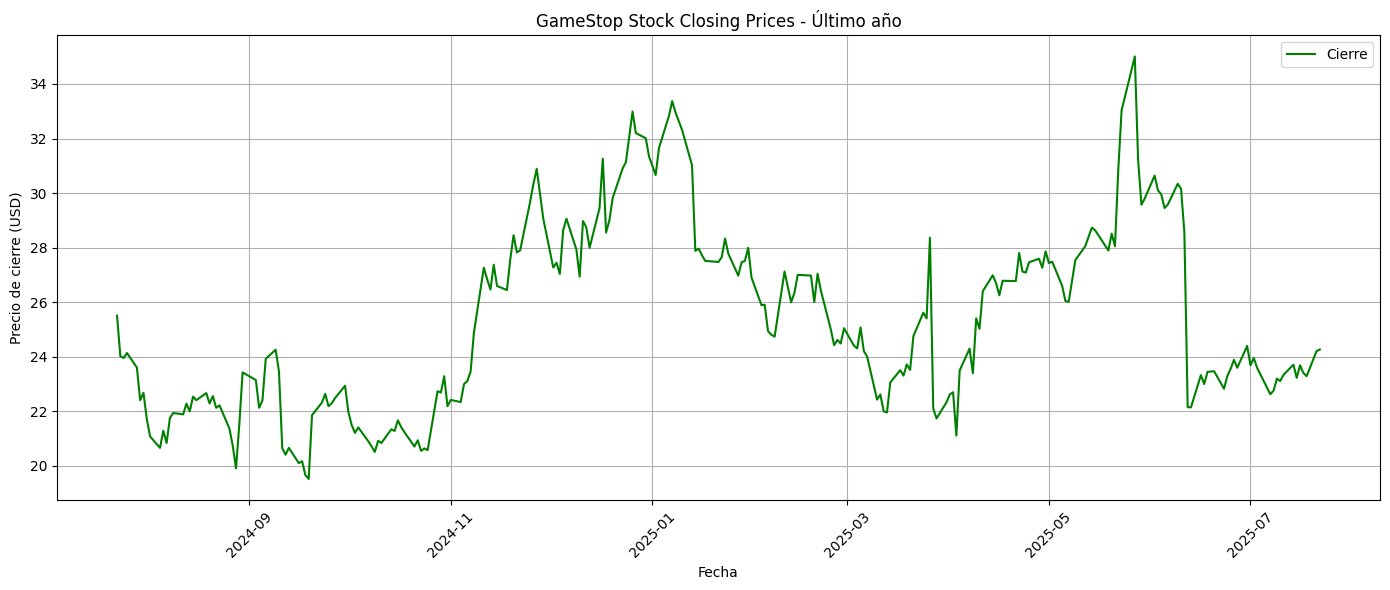

In [6]:
# 1. Importar librerías necesarias
import yfinance as yf
import matplotlib.pyplot as plt

# 2. Descargar datos de GameStop
gme_data = yf.download("GME", period="1y", interval="1d")

# 3. Reiniciar índice para obtener la columna "Date"
gme_data.reset_index(inplace=True)

# 4. Definir la función make_graph si no la tienes ya
def make_graph(data, title):
    plt.figure(figsize=(14,6))
    plt.plot(data["Date"], data["Close"], label="Cierre", color="green")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre (USD)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Graficar datos de GameStop
make_graph(gme_data, "GameStop Stock Closing Prices - Último año")
